<a href="https://colab.research.google.com/github/a1869470/Deep_Learning/blob/main/Assessment_2_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

58889256/58889256 [==============================] - 3s 0us/step


29084464/29084464 [==============================] - 2s 0us/step
Training ResNet...
Epoch 1/2
1563/1563 [==============================] - 3343s 2s/step - loss: 1.2154 - accuracy: 0.5896 - val_loss: 0.8151 - val_accuracy: 0.7276
Epoch 2/2
1563/1563 [==============================] - 3282s 2s/step - loss: 0.7219 - accuracy: 0.7537 - val_loss: 0.6688 - val_accuracy: 0.7708
ResNet - Test loss: 0.6687524914741516; Test accuracy: 0.770799994468689
Training VGG...
Epoch 1/2
1563/1563 [==============================] - 4984s 3s/step - loss: 0.8602 - accuracy: 0.7038 - val_loss: 0.5735 - val_accuracy: 0.8100
Epoch 2/2
1563/1563 [==============================] - 4932s 3s/step - loss: 0.5017 - accuracy: 0.8321 - val_loss: 0.4938 - val_accuracy: 0.8355
VGG - Test loss: 0.4937853515148163; Test accuracy: 0.8355000019073486
Training MobileNet...
Epoch 1/2
1563/1563 [==============================] - 514s 324ms/step - loss: 1.3932 - accuracy: 0.5256 - val_loss: 0.9941 - val_accuracy: 0.6520
Epoch 2

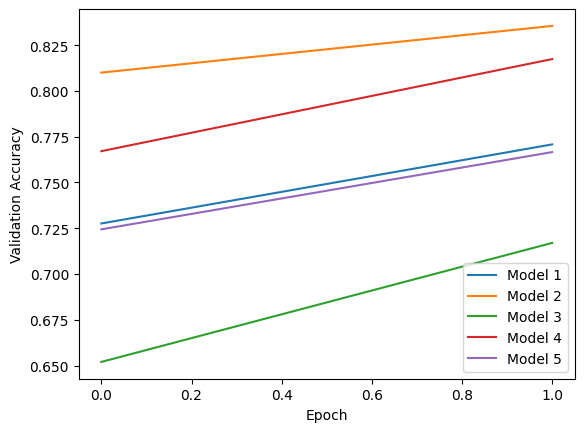

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import ResNet50, VGG16, MobileNet, Xception, DenseNet121
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
num_classes = 10

# Preprocess the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Define function to create a CNN model
def create_cnn_model(base_model, num_classes):
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    predictions = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    return model

# Create and compile models
resnet_model = create_cnn_model(ResNet50(weights='imagenet', include_top=False), num_classes)
vgg_model = create_cnn_model(VGG16(weights='imagenet', include_top=False), num_classes)
# inception_model = create_cnn_model(InceptionV3(weights='imagenet', include_top=False), num_classes)
mobilenet_model = create_cnn_model(MobileNet(weights='imagenet', include_top=False), num_classes)
xception_model = create_cnn_model(Xception(weights='imagenet', include_top=False), num_classes)
densenet_model = create_cnn_model(DenseNet121(weights='imagenet', include_top=False), num_classes)

# Compile models
# for model in [resnet_model, vgg_model, mobilenet_model, xception_model]:
for model in [resnet_model,vgg_model,mobilenet_model,densenet_model,xception_model]:
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train and evaluate models
# models = [resnet_model, vgg_model, mobilenet_model, xception_model]
models = [resnet_model,vgg_model,mobilenet_model, densenet_model,xception_model]
# model_names = ['ResNet', 'VGG', 'MobileNet', 'Xception', 'DenseNet121']
model_names = ['ResNet','VGG','MobileNet','DenseNet121','Xception']

histories = []

for model, model_name in zip(models, model_names):
    print(f"Training {model_name}...")
    history = model.fit(x_train, y_train, epochs=2, batch_size=32, validation_data=(x_test, y_test))
    histories.append(history)
    score = model.evaluate(x_test, y_test, verbose=0)
    print(f"{model_name} - Test loss: {score[0]}; Test accuracy: {score[1]}")

for i, history in enumerate(histories):
    plt.plot(history.history['val_accuracy'], label=f'Model {i + 1}')

plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()